<a href="https://colab.research.google.com/github/fahrulrozi11/Machine-Learning/blob/main/Calssification_Citarum_Water.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings('ignore')


In [10]:
# Mendownload dataset dari GitHub
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/02.%20Week%202/Dataset/CitarumWater.csv"
df = pd.read_csv(url)

# Menampilkan informasi tentang dataset
print("Informasi Dataset:")
print(df.info())

# Menampilkan lima baris pertama dari dataset
print("\nLima baris pertama:")
print(df.head())

# Menampilkan statistik deskriptif dari dataset
print("\nStatistik deskriptif:")
print(df.describe())

# Memeriksa nilai yang hilang pada dataset
print("\nJumlah nilai yang hilang per kolom:")
missing_values = df.isnull().sum()
print(missing_values)
print(f"\nTotal nilai yang hilang: {missing_values.sum()}")


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             2500 non-null   int64  
 1   NamaSungai     2500 non-null   object 
 2   TitikPantau    2500 non-null   object 
 3   Waktu          2500 non-null   object 
 4   pH             2500 non-null   float64
 5   Temp           2500 non-null   object 
 6   TSS            2500 non-null   float64
 7   DO             2500 non-null   float64
 8   BOD            2500 non-null   float64
 9   COD            2500 non-null   float64
 10  Nitrat         2500 non-null   float64
 11  FecalColiform  2500 non-null   float64
 12  Fosfat         2500 non-null   float64
 13  O2             2500 non-null   object 
 14  IP             2500 non-null   float64
 15  Class          2500 non-null   int64  
dtypes: float64(9), int64(2), object(5)
memory usage: 312.6+ KB
None

Lima baris p

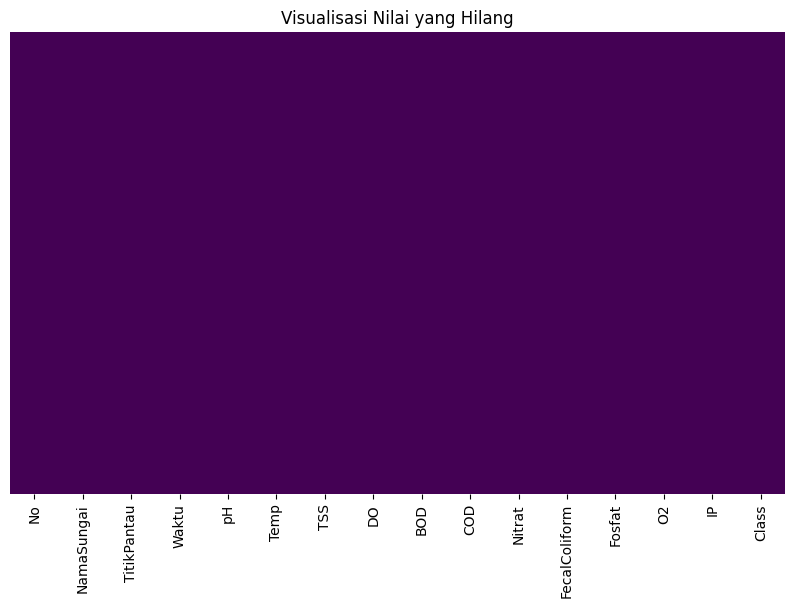


Kolom target adalah: Class


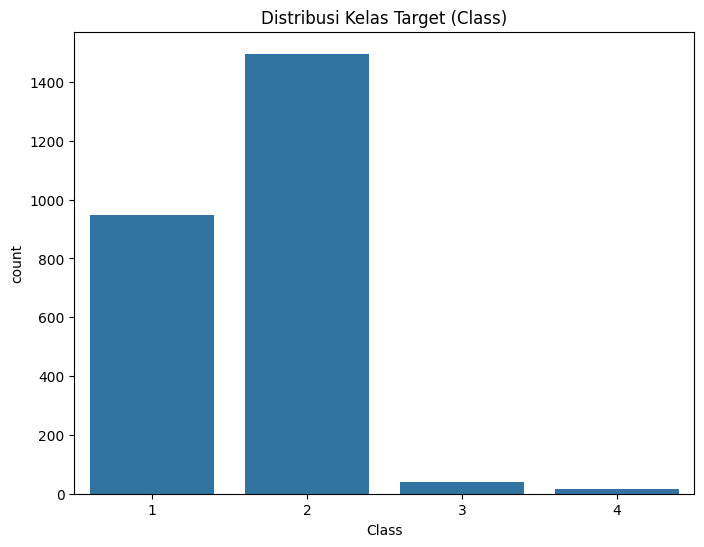

In [11]:

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Visualisasi Nilai yang Hilang')
plt.show()

# Menentukan kolom target, diasumsikan kolom terakhir adalah target
target_column = df.columns[-1]
print(f"\nKolom target adalah: {target_column}")

# Visualisasi distribusi target dengan countplot
plt.figure(figsize=(8, 6))
sns.countplot(x=target_column, data=df)
plt.title(f'Distribusi Kelas Target ({target_column})')
plt.show()

In [12]:
# Pisahkan fitur (X) dan target (y)
X = df.drop(target_column, axis=1)
y = df[target_column]

# Periksa kolom kategorikal dan lakukan one-hot encoding jika ada
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
if categorical_cols.size > 0:
    print("\nMelakukan one-hot encoding untuk kolom kategorikal:")
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
else:
    print("\nTidak ada kolom kategorikal yang perlu di-encode")

# Menangani nilai yang hilang dengan imputasi menggunakan median
print("\nMengatasi nilai yang hilang dengan imputasi median...")
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
print("\nJumlah nilai yang hilang setelah imputasi:", X_imputed.isnull().sum().sum())

# Membagi data menjadi set training dan testing (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Normalisasi fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



Melakukan one-hot encoding untuk kolom kategorikal:

Mengatasi nilai yang hilang dengan imputasi median...

Jumlah nilai yang hilang setelah imputasi: 0


In [13]:
# Membangun model regresi logistik dengan parameter tertentu
print("\nMembangun model regresi logistik...")
model = LogisticRegression(C=1.0, max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test_scaled)

# Menghitung probabilitas prediksi untuk data testing
y_pred_prob = model.predict_proba(X_test_scaled)



Membangun model regresi logistik...


In [14]:
# 1. Menghitung dan menampilkan Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 2. Menghitung Akurasi model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi: {accuracy:.4f}")

# 3. Menghitung Presisi model
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Presisi: {precision:.4f}")

# 4. Menghitung Recall model
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.4f}")

# 5. Menghitung F1-Score model
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-Score: {f1:.4f}")

# 6. Menghitung AUC Score (Area Under Curve)
auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')
print(f"AUC: {auc:.4f}")

# 7. Menampilkan Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Menghitung dan menampilkan ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob[:, 1], pos_label=2)


Confusion Matrix:
[[164  32   0   0]
 [ 23 271   0   0]
 [  0   2   4   0]
 [  0   0   2   2]]

Akurasi: 0.8820
Presisi: 0.8822
Recall: 0.8820
F1-Score: 0.8811
AUC: 0.9640

Classification Report:
              precision    recall  f1-score   support

           1       0.88      0.84      0.86       196
           2       0.89      0.92      0.90       294
           3       0.67      0.67      0.67         6
           4       1.00      0.50      0.67         4

    accuracy                           0.88       500
   macro avg       0.86      0.73      0.77       500
weighted avg       0.88      0.88      0.88       500



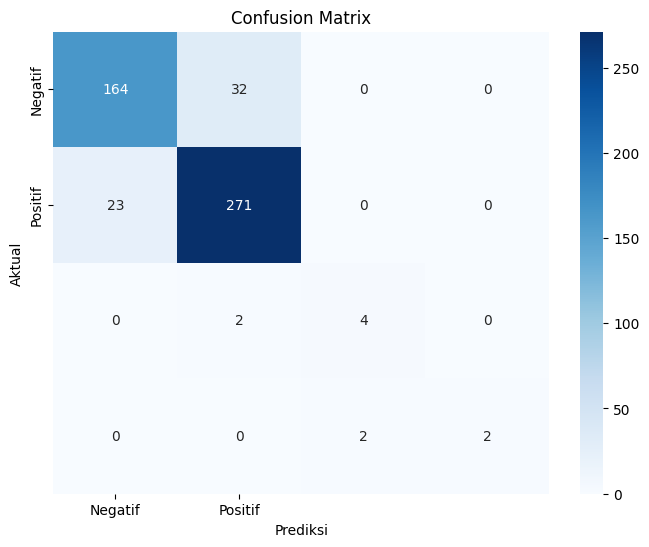

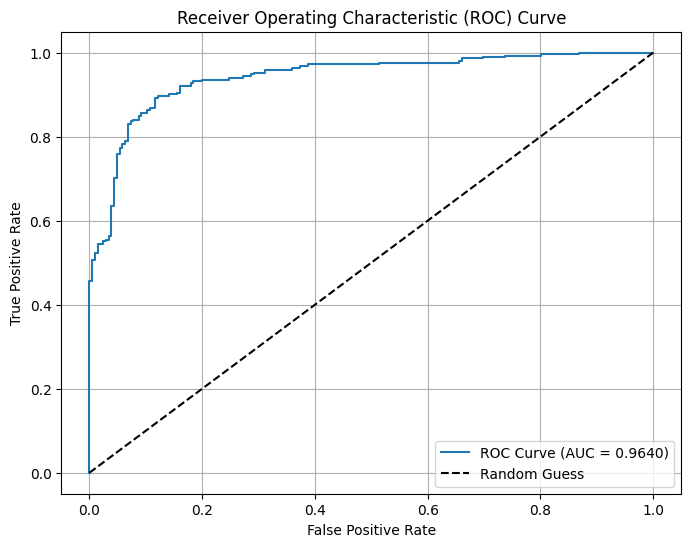

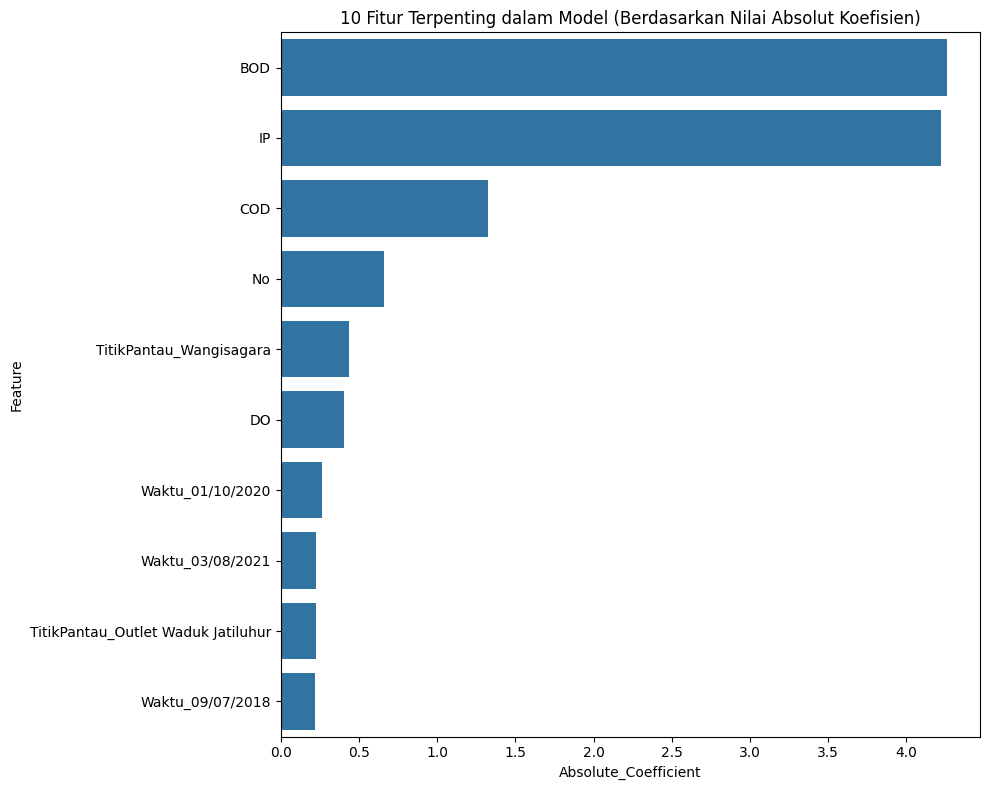


=== Contoh Prediksi ===
Data sampel:
No                1448.000000
pH                   6.887661
TSS                 33.668386
DO                   1.846283
BOD                  2.590130
                     ...     
Waktu_9/9/2018       0.000000
Waktu_9/9/2019       0.000000
Waktu_9/9/2020       0.000000
Waktu_9/9/2021       0.000000
Waktu_9/9/2022       0.000000
Name: 1447, Length: 1801, dtype: float64

Prediksi: Negatif
Probabilitas positif: 0.8814


In [15]:
# 1. Visualisasi Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negatif', 'Positif'],
            yticklabels=['Negatif', 'Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

# 2. Visualisasi ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid(True)
plt.show()

# 3. Visualisasi Feature Importance (berdasarkan nilai absolut koefisien)
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
coefficients['Absolute_Coefficient'] = coefficients['Coefficient'].abs()
coefficients_top10 = coefficients.sort_values(by='Absolute_Coefficient', ascending=False).head(10)

plt.figure(figsize=(10, 8))
sns.barplot(x='Absolute_Coefficient', y='Feature', data=coefficients_top10)
plt.title('10 Fitur Terpenting dalam Model (Berdasarkan Nilai Absolut Koefisien)')
plt.tight_layout()
plt.show()

# 4. Contoh prediksi untuk data baru
print("\n=== Contoh Prediksi ===")
# Ambil sampel dari data testing
sample = X_test.iloc[0]
sample_scaled = scaler.transform([sample])
prediction = model.predict(sample_scaled)[0]
prediction_prob = model.predict_proba(sample_scaled)[0, 1]

print("Data sampel:")
print(sample)
print(f"\nPrediksi: {'Positif' if prediction == 1 else 'Negatif'}")
print(f"Probabilitas positif: {prediction_prob:.4f}")
